In [3]:
import pandas as pd 
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots
markers = ['o', 's', 'D', 'v', 'p', 'P', 'X', 'h', 'H', 'd']
colors_discrete = sns.color_palette('tab10')
colors_continuous = sns.color_palette('viridis')
linestyles = ['-', '--', '-.', ':']


# Do not hide any columns
pd.set_option('display.max_columns', None)

results_path = 'results_combined'
images_dir = f'{results_path}/images'
results_list = []
recover_list = [] 

# Read all the results from results/ directory
for dirs in os.listdir(results_path):
    results = {}
    recover = {}
    if 'results' in dirs:
        if not os.path.isdir(f'{results_path}/{dirs}'):
            continue
        for file in os.listdir(f'{results_path}/{dirs}/results'):
            if file.endswith('.feather') and '__9' not in dirs:
                number = int(file.split('_')[0])
                res_pd = pd.read_feather(f'{results_path}/{dirs}/results/{file}')
                rec_pd = pd.read_feather(f'{results_path}/{dirs}/recover/{file}')
                
                res_pd = res_pd[res_pd['dataset_name'] != 'breast_cancer']
                rec_pd = rec_pd[rec_pd['dataset_name'] != 'breast_cancer']
                
                if '__9' in dirs:
                    res_pd = res_pd[res_pd['base_counterfactual_time'].isna()]
                
                results[number] = res_pd
                recover[number] = rec_pd
                
                

    sorted_keys = sorted(results.keys()) 
    for k in sorted_keys:
        results_list.append(results[k])
        recover_list.append(recover[k])
    
    print(f'Processed {dirs} directory')
    # break
    
# Concatenate all the results
raw_df: pd.DataFrame = pd.concat(results_list, ignore_index=True)
recover_df: pd.DataFrame = pd.concat(recover_list, ignore_index=True)
# print(recover_df.info())
raw_df.head(3)

Processed results_wine1__9 directory
Processed results_breast1 directory
Processed results_breast2__9 directory
Processed robx directory
Processed results_fico2 directory
Processed results_breast2 directory
Processed results_breast1__9 directory
Processed results_fico1__9 directory
Processed results_fico2__9 directory
Processed results_wine1 directory
Processed results_fico1 directory
Processed images directory
Processed results_wine2 directory
Processed results_wine2__9 directory


,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,start_sample_passes_test,counterfactual_does_not_pass_test,counterfactual_does_not_have_target_class,counterfactual_is_nan,highest_delta,lower_bound_beta,upper_bound_beta
0,Seed-Architecture,fico,32,0,Seed-Architecture,0.95,0.5,Model2_0,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.088027,0,0.118728,0,"[0.42316228322143384, 0.5902224921053054, 0.11...",0.537076,1.0,0.550801,1.0,1.0,3.181537,0.836189,0.768268,0.533333,1.0,0.014567,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Seed-Architecture,fico,32,0,Seed-Architecture,0.95,0.5,Model2_0,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.088027,0,0.118728,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.42307306858971444, 0.5909860253154476, 0.11...",0.54029,1.0,0.55418,1.0,1.0,3.209884,0.84118,0.771598,0.533333,1.0,0.039621,0.000115,2.160914,0.0,0.0,0.0,0.0,0.516128,0.516128,0.826645
2,Seed-Architecture,fico,32,0,Seed-Architecture,0.95,0.5,Model2_1,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.088027,0,0.128949,0,"[0.42316228322143384, 0.5902224921053054, 0.11...",0.537076,1.0,0.509835,1.0,1.0,3.181537,0.836189,0.768268,0.533333,1.0,0.014567,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# import scipy.stats as stats

# lb = 0.516128
# ub = 0.826645
# alpha = 0.95
# k = 32
# prior_a = 0.5
# prior_b = 0.5

# def find_beta_params(lb, ub, alpha, k, prior_a, prior_b):
#     # Find parameters of the beta distribution that result in the given credible interval
#     for a in range(k):
#         b = k - a
#         lb, ub = stats.beta.interval(alpha, prior_a + a, prior_b + b)
        
#         if np.isclose(lb, 0.516128, atol=1e-5) and np.isclose(ub, 0.826645, atol=1e-5):
#             # print(f'Found a = {a}, b = {b}')
#             break
        
#     return a, b

# # find_beta_params(lb, ub, alpha, k, prior_a, prior_b)

# lbs = raw_df['lower_bound_beta']
# ubs = raw_df['upper_bound_beta']

# import multiprocessing


# def mp_find_beta_params(lb: list, ub: list, alpha: float, k: int, prior_a: float, prior_b: float, workers: int = 4):
    
#     def find_beta_params(lbs, ubs, alpha, k, prior_a, prior_b):
        
#         r = []
#         for i, (lb, ub) in enumerate(zip(lbs, ubs)):
#             # Find parameters of the beta distribution that result in the given credible interval
#             for a in range(k):
#                 b = k - a
#                 lb, ub = stats.beta.interval(alpha, prior_a + a, prior_b + b)

#                 if np.isclose(lb, 0.516128, atol=1e-5) and np.isclose(ub, 0.826645, atol=1e-5):
#                     r.append((a, b))
#                     break
#             if i % 1000 == 0:
#                 print(f'Processed {i} elements')
#         return r
    
#     processes = []
    
#     for i in range(workers):
#         n = len(lb)
#         chunks = np.array_split(np.arange(n), workers)
        
#         lb_part = lb[chunks[i]]
#         ub_part = ub[chunks[i]]
        
#         print(f'Processing {len(lb_part)} elements')
        
#         p = multiprocessing.Process(target=find_beta_params, args=(lb_part, ub_part, alpha, k, prior_a, prior_b))
#         processes.append(p)
#         p.start()
        
#     results = []
    
#     for p in processes:
#         p.join()
#         results.append(p)
    
#     return results

# results = mp_find_beta_params(lbs, ubs, alpha, k, prior_a, prior_b, workers=4)

# raw_df['beta_alpha'], raw_df['beta_beta'] = zip(*results)


# raw_df['beta_alpha'] = raw_df['beta_alpha'].astype(int)
# raw_df['beta_beta'] = raw_df['beta_beta'].astype(int)

# raw_df['beta_alpha'].value_counts()

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[1] Does higher Beta lead to better empirical robustness?</div>

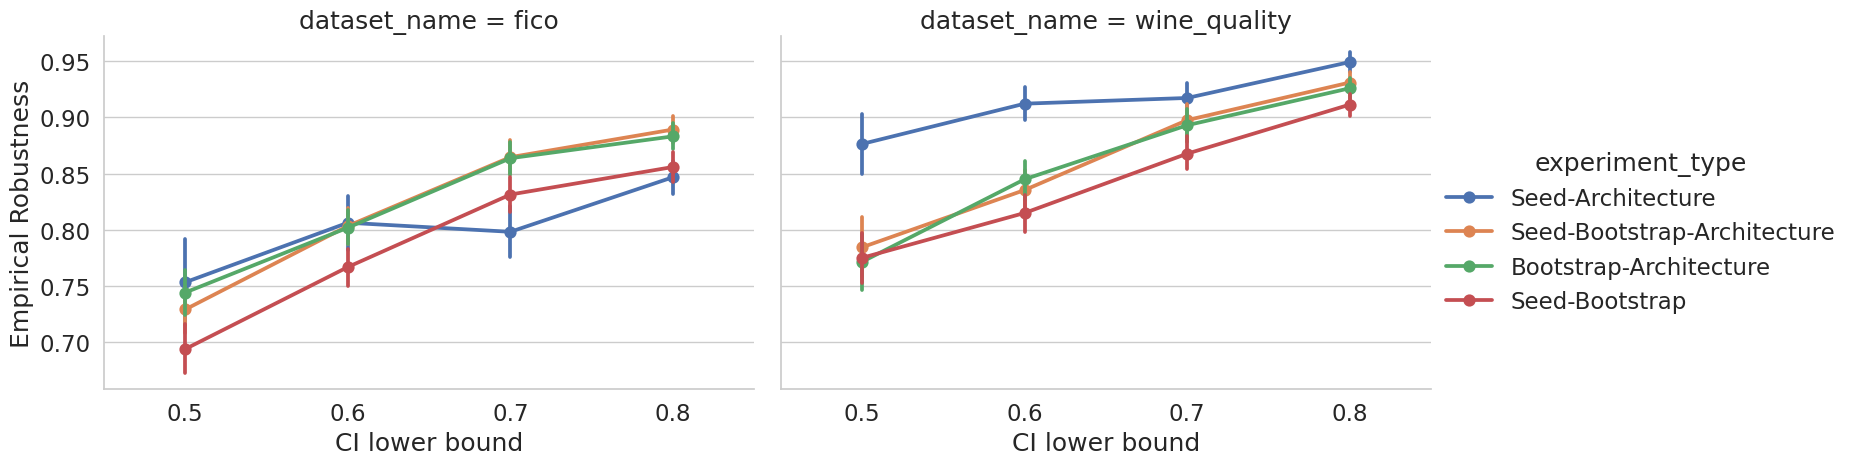

In [68]:
# Split by expeirment type (hue) and dataset (col)
# x-axis: lower bound discretized
# y-axis: average empirical robustness

_tmp_df = raw_df.copy()
lb_threshs = [0.5, 0.6, 0.7, 0.8, 0.9]
_tmp_df['CI lower bound'] = pd.cut(_tmp_df['lower_bound_beta'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['CI midpoint'] = (_tmp_df['lower_bound_beta'] + _tmp_df['upper_bound_beta']) / 2
_tmp_df['CI midpoint'] = pd.cut(_tmp_df['CI midpoint'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['Empirical Robustness'] = _tmp_df['robust_counterfactual_validity_model2'].astype(float)

sns.set_theme(style='whitegrid', font_scale=1.5)

sns.catplot(data=_tmp_df, 
            x='CI lower bound',
            y='Empirical Robustness',
            hue='experiment_type', 
            col='dataset_name', 
            kind='point', 
            # palette=colors_discrete, 
            # markers=markers, 
            height=5, 
            aspect=1.5,
)

plt.savefig(f'{images_dir}/1_robustness_vs_ci_lower_bound.png', dpi=300, bbox_inches='tight')

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[2] Is the empirical validity δ-Robust?</div>

/tmp/ipykernel_139697/3681368201.py:76: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


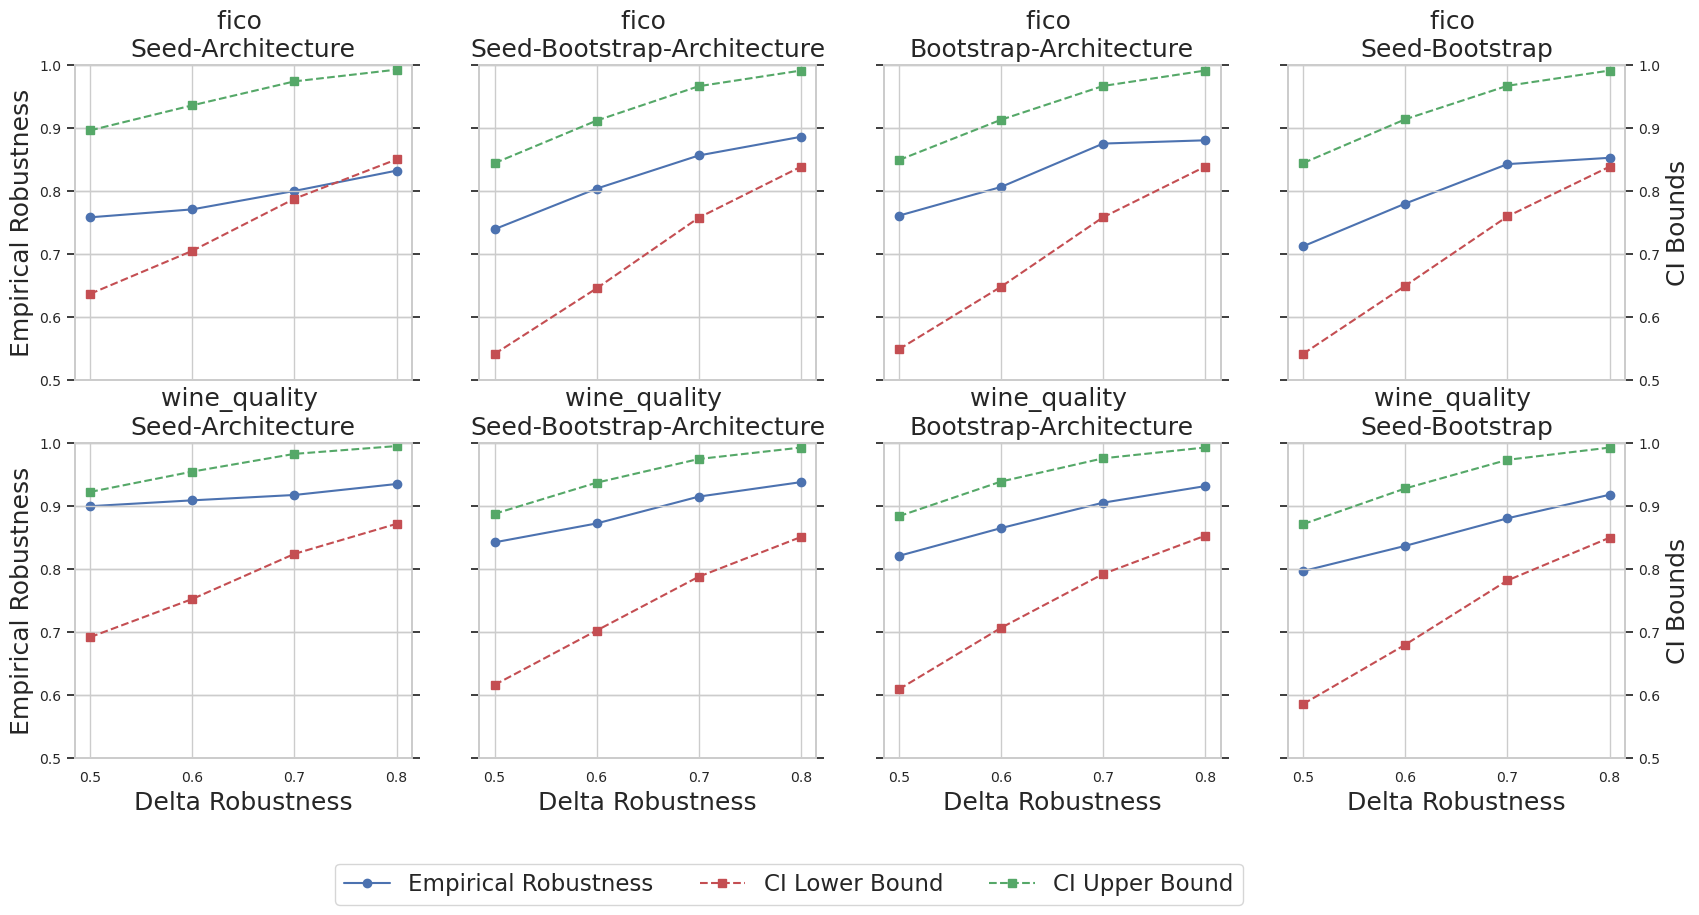

In [69]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

datasets = raw_df['dataset_name'].unique()
experiment_types = raw_df['experiment_type'].unique()
delta_robustness = raw_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11

fig, axes = plt.subplots(nrows=len(datasets), ncols=len(experiment_types), figsize=(20, 9), sharex=True, sharey=True)



for i, dataset in enumerate(datasets):
    for j, experiment_type in enumerate(experiment_types):
        _df = raw_df[(raw_df['dataset_name'] == dataset) & (raw_df['experiment_type'] == experiment_type)]
        
        data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
        
        ax = axes[i, j]
        ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
        ax.set_title(f'{dataset} \n{experiment_type}')
        
        if i == len(datasets) - 1:
            ax.set_xlabel('Delta Robustness')
        # ax.set_xlabel('Delta Robustness')
        if j == 0:
            ax.set_ylabel('Empirical Robustness')
        
        
        data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
        data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
        
        ax2 = ax.twinx()
        
        ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
        
        ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
        
        if j == len(experiment_types) - 1:
            ax2.set_ylabel('CI Bounds')
        
        
        l = 0.5
        ax.set_ylim(l, 1)
        ax2.set_ylim(l, 1)
        # Make x-axis labels more coarse i.e. only show rounded to tenths
        ax_lim = ax.get_xlim()
        ax.set_xticks(np.arange(ax_lim[0], ax_lim[1], 0.1).round(1))
        

        if i == 1 and j == 0:
            ax_legend_handles, ax_legend_labels = ax.get_legend_handles_labels()
            ax2_legend_handles, ax2_legend_labels = ax2.get_legend_handles_labels()
            
            ax.legend(ax_legend_handles + ax2_legend_handles, ax_legend_labels + ax2_legend_labels, ncol=3, bbox_to_anchor=(3.5, -0.3))
            
            
        # Decrease font size of the labels
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax2.tick_params(axis='both', which='major', labelsize=10)
        
        # Turn off label ticks for ax2 on the plots that are not on the right
        if j != len(experiment_types) - 1:
            ax2.set_yticklabels([])
            
        


plt.savefig(f'{images_dir}/2_empirical_robustness_ci_bounds.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[3] Comparision to RobX</div>

In [70]:
resultsrobx = []

tobx_results_path = 'results_combined' + '/robx'

results_list = []
recover_list = []

for dirs in os.listdir(tobx_results_path):
    results = {}
    recover = {}
    if 'results' in dirs:
        for file in os.listdir(f'{tobx_results_path}/{dirs}/results/'):
            # print(file)
            if file.endswith('.feather'):
                number = int(file.split('_')[0])
                res = pd.read_feather(f'{tobx_results_path}/{dirs}/results/{file}')
                rec = pd.read_feather(f'{tobx_results_path}/{dirs}/recover/{file}')
                
                res[['beta_confidence', 'delta_robustness']] = rec[['beta_confidence', 'delta_robustness']]

                results[number] = res
                recover[number] = rec
                
    sorted_keys = sorted(results.keys())
    for k in sorted_keys:
        results_list.append(results[k])
        recover_list.append(recover[k])

# Concatenate all the results
robx_raw_df: pd.DataFrame = pd.concat(results_list, ignore_index=True)
robx_recover_df: pd.DataFrame = pd.concat(recover_list, ignore_index=True)

# Rename beta_confidence to tau and delta_robustness to variance
robx_raw_df = robx_raw_df.rename(columns={'beta_confidence': 'tau', 'delta_robustness': 'variance'})
robx_recover_df = robx_recover_df.rename(columns={'beta_confidence': 'tau', 'delta_robustness': 'variance'})
robx_raw_df.head(5)

,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,tau,variance,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time
0,Bootstrap-Architecture,fico,32,0,Bootstrap-Architecture,0.4,0.01,Model2_0,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.089378,0,0.145639,0,"[0.4054907886107322, 0.3674621710831245, 0.079...",0.508312,1,0.452049,0,1,2.491266,0.632239,0.68463,0.4,0,0.014776,"[0.5107405833305784, 0.3596986895464249, 0.070...",0.592979,1.0,0.539607,1.0,1.0,2.397353,0.574735,0.546697,0.600000,1.0,1.039486,0.086727,0.511540
1,Bootstrap-Architecture,fico,32,0,Bootstrap-Architecture,0.4,0.01,Model2_1,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.089378,0,0.042922,0,"[0.4054907886107322, 0.3674621710831245, 0.079...",0.508312,1,0.379078,0,1,2.491266,0.632239,0.68463,0.4,0,0.014776,"[0.4884297079741469, 0.3613443941234107, 0.072...",0.575650,1.0,0.606881,1.0,1.0,2.377855,0.574931,0.571576,0.466667,1.0,0.819136,0.053856,0.271883
2,Bootstrap-Architecture,fico,32,0,Bootstrap-Architecture,0.4,0.01,Model2_2,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.089378,0,0.093227,0,"[0.4054907886107322, 0.3674621710831245, 0.079...",0.508312,1,0.668090,1,1,2.491266,0.632239,0.68463,0.4,1,0.014776,"[0.46237201566645453, 0.3571173577282633, 0.08...",0.586333,1.0,0.655356,1.0,1.0,2.273342,0.587042,0.583303,0.400000,1.0,0.842353,0.069818,0.281920
3,Bootstrap-Architecture,fico,32,0,Bootstrap-Architecture,0.4,0.01,Model2_3,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.089378,0,0.150411,0,"[0.4054907886107322, 0.3674621710831245, 0.079...",0.508312,1,0.457429,0,1,2.491266,0.632239,0.68463,0.4,0,0.014776,"[0.46237201566645453, 0.3571173577282633, 0.08...",0.586333,1.0,0.527740,1.0,1.0,2.273342,0.587042,0.583303,0.400000,1.0,0.842353,0.069818,0.431172
4,Bootstrap-Architecture,fico,32,0,Bootstrap-Architecture,0.4,0.01,Model2_4,"[0.423076923076923, 0.19064124783362218, 0.192...",0,0.089378,0,0.101947,0,"[0.4054907886107322, 0.3674621710831245, 0.079...",0.508312,1,0.376229,0,1,2.491266,0.632239,0.68463,0.4,0,0.014776,"[0.4884297079741469, 0.3613443941234107, 0.072...",0.575650,1.0,0.484310,0.0,1.0,2.377855,0.574931,0.571576,0.466667,0.0,0.819136,0.053856,0.436559


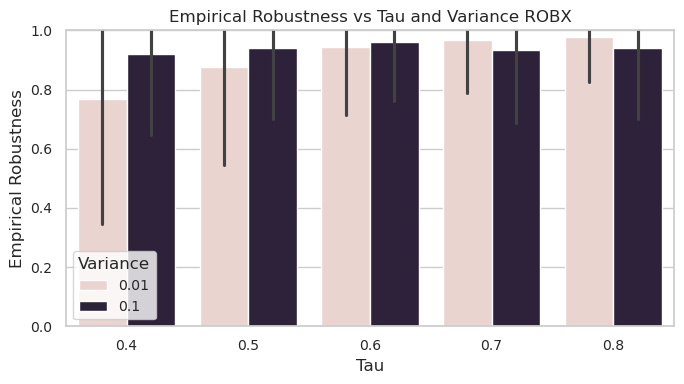

In [81]:
fig, ax = plt.subplots(figsize=(7, 4))
# Change font size
sns.set_theme(style='whitegrid', font_scale=1)
sns.barplot(data=robx_raw_df, x='tau', y='robust_counterfactual_validity_model2', hue='variance', errorbar='sd')
plt.title('Empirical Robustness vs Tau and Variance ROBX')
plt.ylabel('Empirical Robustness')
plt.xlabel('Tau')
plt.ylim(0, 1)

# Change font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Change legend font size
plt.legend(fontsize=10, title='Variance')

plt.tight_layout()
plt.savefig(f'{images_dir}/3_empirical_robustness_vs_tau_variance.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_139697/4157323218.py:45: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g2 = sns.scatterplot(data=betarob_merge,
/tmp/ipykernel_139697/4157323218.py:71: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


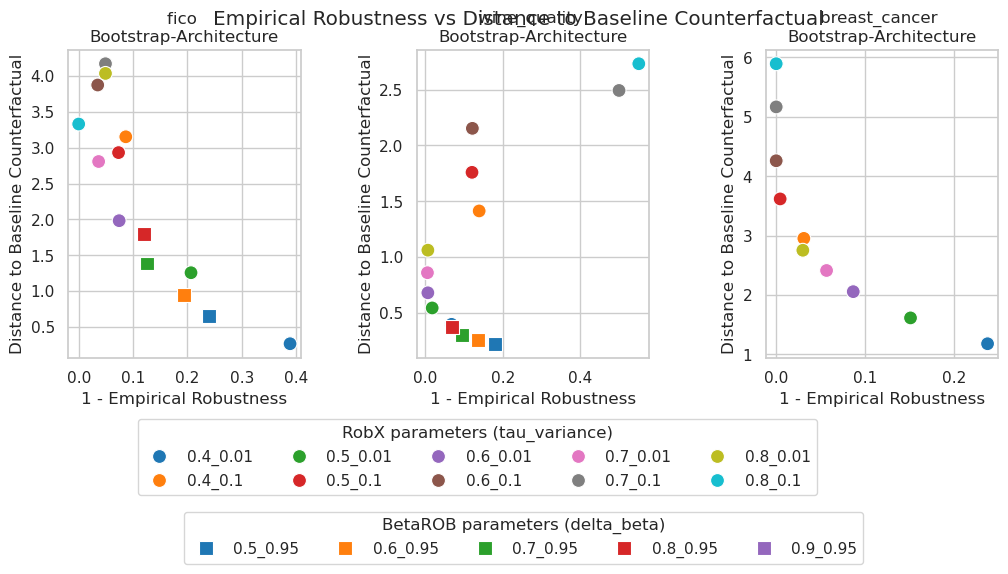

In [152]:


datasets = robx_raw_df['dataset_name'].unique()
experiment_types = robx_raw_df['experiment_type'].unique()

fig, axes = plt.subplots(ncols=len(datasets), nrows=len(experiment_types), figsize=(12, 4))

# sns.set_theme(style='whitegrid', font_scale=1)

ax = axes.flatten()

for i, experiment_type in enumerate(experiment_types):
    for j, dataset in enumerate(datasets):
        ite = i * len(experiment_types) + j
        
        tmp_robx_df = robx_raw_df.copy()
        tmp_robx_df = tmp_robx_df[(tmp_robx_df['dataset_name'] == dataset) & (tmp_robx_df['experiment_type'] == experiment_type)]
        tmp_robx_df['robust_counterfactual_validity_model2'] = 1 - tmp_robx_df['robust_counterfactual_validity_model2'].astype(float)
        robx_agg_empirical = tmp_robx_df.groupby(['tau', 'variance'])['robust_counterfactual_validity_model2'].mean().reset_index()
        robx_agg_dist_to_baseline = tmp_robx_df.groupby(['tau', 'variance'])['robust_counterfactual_L1_distance_from_base_cf'].mean().reset_index()
        
        tmp_raw_df = raw_df.copy()
        tmp_raw_df = tmp_raw_df[(tmp_raw_df['dataset_name'] == dataset) & (tmp_raw_df['experiment_type'] == experiment_type)]
        tmp_raw_df['robust_counterfactual_validity_model2'] = 1 - tmp_raw_df['robust_counterfactual_validity_model2'].astype(float)
        betarob_agg_empirical = tmp_raw_df.groupby(['delta_robustness', 'beta_confidence'])['robust_counterfactual_validity_model2'].mean().reset_index()  
        betarob_agg_dist_to_baseline = tmp_raw_df.groupby(['delta_robustness', 'beta_confidence'])['robust_counterfactual_L1_distance_from_base_cf'].mean().reset_index()


        # Create scatter plot of dist vs empirical for both ROBX and BetaROB
        robx_merge = pd.merge(robx_agg_empirical, robx_agg_dist_to_baseline, on=['tau', 'variance'], suffixes=('_empirical', '_dist'))
        robx_merge['tau_var'] = robx_merge['tau'].astype(str) + '_' + robx_merge['variance'].astype(str)

        betarob_merge = pd.merge(betarob_agg_empirical, betarob_agg_dist_to_baseline, left_on=['delta_robustness', 'beta_confidence'], right_on=['delta_robustness', 'beta_confidence'], suffixes=('_empirical', '_dist'))
        betarob_merge['delta_beta'] = betarob_merge['delta_robustness'].astype(str) + '_' + betarob_merge['beta_confidence'].astype(str)

        g1 = sns.scatterplot(data=robx_merge, 
                        x='robust_counterfactual_validity_model2', 
                        y='robust_counterfactual_L1_distance_from_base_cf', 
                        hue='tau_var',
                        ax=ax[ite],
                        marker='o',
                        s=100,
                        palette='tab10',
                        legend=True if i == 0 and j == 0 else False
        )

        g2 = sns.scatterplot(data=betarob_merge, 
                        x='robust_counterfactual_validity_model2', 
                        y='robust_counterfactual_L1_distance_from_base_cf', 
                        hue='delta_beta',
                        ax=ax[ite],
                        marker='s',
                        s=100,
                        palette='tab10',
                        legend=True if i == 0 and j == 1 else False
        )

        ax[ite].set_xlabel('1 - Empirical Robustness')
        ax[ite].set_ylabel('Distance to Baseline Counterfactual')
        ax[ite].set_title(f'{dataset} \n{experiment_type}')
        
        if i == 0 and j == 0 or i == 0 and j == 1:
            if i == 0 and j == 0:
                ax[ite].legend(title='RobX parameters (tau_variance)',  ncol=5, bbox_to_anchor=(0.3, -0.2), loc=2, borderaxespad=0.)
            else:
                ax[ite].legend(title='BetaROB parameters (delta_beta)', ncol=5, bbox_to_anchor=(-1, -0.5), loc=2, borderaxespad=0.)
        # ax.set_legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncols=3, title='Methods and Parameters')

# Increase padding between subplots
plt.subplots_adjust(wspace=0.5, hspace=1) 

plt.suptitle('Empirical Robustness vs Distance to Baseline Counterfactual')
plt.tight_layout()
